In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

## Data Collection


In [2]:
#loading the dataset to a Pandas DataFrame
wine_dataset=pd.read_csv('winequality-red.csv')

In [3]:
#number of rows & columns in the dataset
wine_dataset.shape

(1596, 12)

In [4]:
#first 5 rows of dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 ## Data Analysis and Visualization

In [6]:
#statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


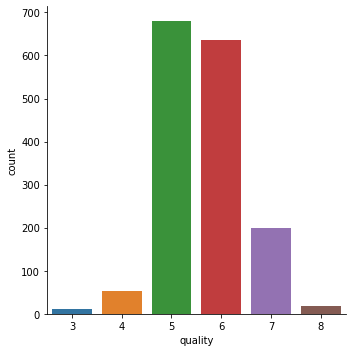

In [7]:
#number of values for each quality
sns.catplot(x='quality', data = wine_dataset,kind = 'count')

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

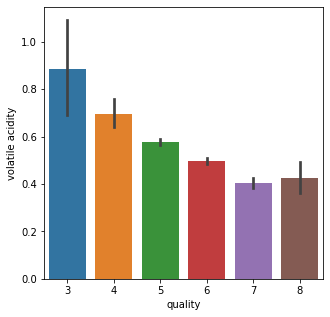

In [8]:
#volatile acidity vs Quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity',data = wine_dataset)

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

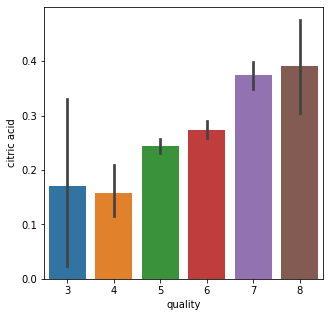

In [9]:
#citric acid vs Quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid',data = wine_dataset)

## Correlation
1. Positive correlation
2. Negative correlation

In [10]:
correlation = wine_dataset.corr()

<AxesSubplot: >

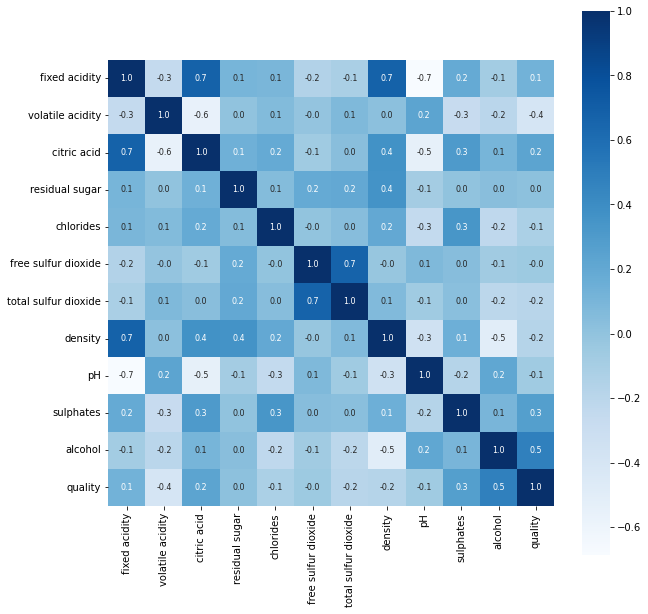

In [11]:
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt ='.1f', annot = True, annot_kws = {'size':8},cmap = 'Blues')

## Data Preprocessing 

In [12]:
#separate the data and Label
X= wine_dataset.drop('quality',axis=1)

In [13]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1591            6.2             0.600         0.08             2.0      0.090   
1592            5.9             0.550         0.10             2.2      0.062   
1593            6.3             0.510         0.13             2.3      0.076   
1594            5.9             0.645         0.12             2.0      0.075   
1595            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Label Binarization

In [14]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [15]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1591    0
1592    0
1593    0
1594    0
1595    0
Name: quality, Length: 1596, dtype: int64


### Train & Test Split

In [16]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size =0.2, random_state =3)

In [17]:
print(Y.shape , Y_train.shape, Y_test.shape)

(1596,) (1276,) (320,)


### Model Training: 

Random Forest 

In [18]:
model = RandomForestClassifier()

In [19]:
model.fit(X_train,Y_train)

RandomForestClassifier()

### MODEL EVALUATION

ACCURACY SCORE

In [20]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [21]:
print("ACCURACY: ",test_data_accuracy)

ACCURACY:  0.890625


In [23]:
# predicting score
model_score = model.score(X_test,Y_test)
print('score of model is : ',model_score)
# display error rate
print('calculating the error')
# calculating mean squared error
model_MSE = mean_squared_error(Y_test,X_test_prediction)
# calculating root mean squared error
model_RMSE = np.sqrt(model_MSE)
# display MSE
print('mean squared error is : ',model_MSE)
# display RMSE
print('root mean squared error is : ',model_RMSE)
print(classification_report(X_test_prediction,Y_test))

score of model is :  0.890625
calculating the error
mean squared error is :  0.109375
root mean squared error is :  0.33071891388307384
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       294
           1       0.41      0.81      0.55        26

    accuracy                           0.89       320
   macro avg       0.70      0.85      0.74       320
weighted avg       0.94      0.89      0.91       320



### BUILDING A PREDICTIVE SYSTEM

In [68]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

In [69]:
#changing the input_data in numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [70]:
#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [71]:
prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [72]:
x_predict = list(model.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': Y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
264,0,0
407,0,0
944,1,1
1372,0,0
884,0,1
1012,0,0
1224,0,0
962,0,0
674,0,0
1071,0,0


In [73]:
if(prediction[0]==1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine
